**Challenge: Build your own model to predict property crime**

Orginal multivariate linear regression model: $$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

Modified multivariate linear regression model: $$ Property Crime = \alpha + Population + Population^2 + Larcenytheft + Motorvehicletheft + Arson3 $$

In the modified model I selected variables that maybe associated with property crime. I removed the variables Murder and Robbery and replaced them with Larceny, Motor theft, and arson. 

**Orginal model:**
Mean Absolute Error(MAE): 117.26229643367456 - Forecast of the accuracy within the model 
Mean Squared Error(MSE): 52064.62430650684 - Estimator (assess the quality of the predictor)
Root Mean Square Error(RMSE): 228.17673918808384 - Standard deviation of the residuals (predicted errors)

**Modified model:**
Mean Absolute Error(MAE): 18.093812164948645
Mean Squared Error(MSE): 1089.6644239477946
Root Mean Square Error(RMSE): 33.01006549444873 

Across all evaluators of the multivariate linear regression model, the modified model is far more accurate at predicting the true outcome. Comparing the RMSE between the models the modified model has 33.01 this value reflects the square root of the variance of residuals. A low value indicates there it is very close to the absolute fit of the regression model. 

In the code below goes through how the modified model is set up, calucations of the following (MAE, MSE, RMSE), plotting the residuals, and an X-Y-Z plot of (Property Crime ~ Larceny + Motor Theft). 

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
sns.set_style("white")
plt.style.use('seaborn-white')

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

from sklearn import linear_model
from sklearn import preprocessing
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
from mpl_toolkits.mplot3d import axes3d

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [21]:
df = pd.read_csv('/Users/mille/Desktop/Simple Linear Regression/NYC_crime.csv')


In [22]:
df.head()

,City,Population,Pop2,Violent_crime,Murder_nonneg_nonman,Rape1,Rape2,Robbery,Agg_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson3
0,Adams Village,1861.000,3463321.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,6640929.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,8099716.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,9595377936.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,40806544.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


**Dropping columns**



In [23]:
df = df.drop(columns=['Rape1'])

**Data frame information on data types**

In [24]:
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
City                    348 non-null object
Population              348 non-null float64
Pop2                    348 non-null float64
Violent_crime           348 non-null float64
Murder_nonneg_nonman    348 non-null float64
Rape2                   348 non-null float64
Robbery                 348 non-null float64
Agg_assault             348 non-null float64
Property_crime          348 non-null float64
Burglary                348 non-null float64
Larceny_theft           348 non-null float64
Motor_vehicle_theft     348 non-null float64
Arson3                  187 non-null float64
dtypes: float64(12), object(1)
memory usage: 35.4+ KB


$$ Property Crime = \alpha + Population + Pop squared + Larcenytheft + Motorvehicletheft + Arson3 $$

Converting non-null objects to numeric values float64. 

In [25]:
df['Population'] = df[['Population']].convert_objects(convert_numeric=True)
df['Violent_crime'] = df[['Violent_crime']].convert_objects(convert_numeric=True)
df['Agg_assault'] = df[['Agg_assault']].convert_objects(convert_numeric=True)
df['Pop2'] = df[['Pop2']].convert_objects(convert_numeric=True)
df['Motor_vehicle_theft'] = df[['Motor_vehicle_theft']].convert_objects(convert_numeric=True)
df['Robbery'] = df[['Robbery']].convert_objects(convert_numeric=True)
df['Larceny_theft'] = df[['Larceny_theft']].convert_objects(convert_numeric=True)
df['Arson3'] = df[['Arson3']].convert_objects(convert_numeric=True)



df.head()

C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel packag

,City,Population,Pop2,Violent_crime,Murder_nonneg_nonman,Rape2,Robbery,Agg_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson3
0,Adams Village,1861.000,3463321.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,6640929.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,8099716.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,9595377936.000,791.000,8.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,40806544.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


In [26]:
df = df.fillna(0)


**Exploratory Data Analysis**

C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


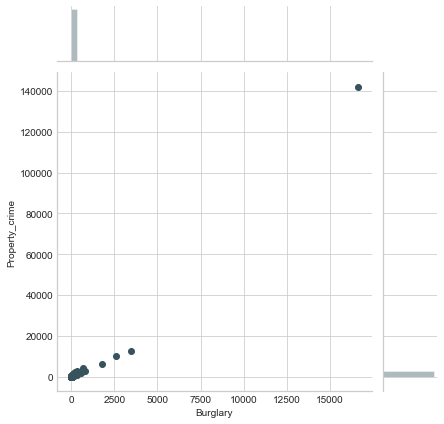

In [27]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

sns.jointplot(x='Burglary',y='Property_crime',data=df)

**Identifying outliers in the data**

NYC is identified as an outlier in the dataset. The outlier is removed to conduct the regression analysis. 

         City  Population               Pop2  Violent_crime  \
216  New York 8396126.000 70494931807876.000      52384.000   

     Murder_nonneg_nonman    Rape2   Robbery  Agg_assault  Property_crime  \
216               335.000 1112.000 19170.000    31767.000      141971.000   

     Burglary  Larceny_theft  Motor_vehicle_theft  Arson3  
216 16606.000     117931.000             7434.000   0.000  


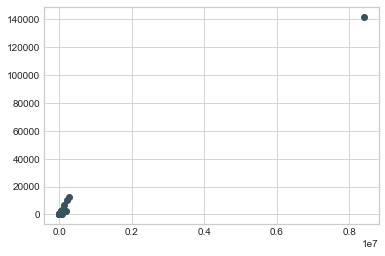

In [28]:
print(df.loc[df['Population']==max(df['Population']),:])

plt.scatter(df['Population'],df['Property_crime'])
plt.show()

In [29]:
nonyc=df.loc[df['City']!="New York",:]

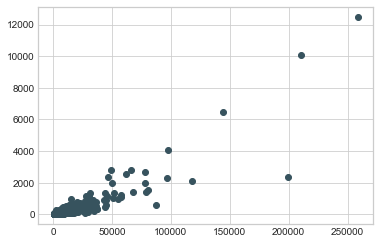

In [30]:
plt.scatter(nonyc['Population'],nonyc['Property_crime'])
plt.show()

**Building a training model**

In [31]:
nonyc['Pop_sq']=nonyc['Population']*nonyc['Population']

print(nonyc.head())

                       City  Population           Pop2  Violent_crime  \
0             Adams Village    1861.000    3463321.000          0.000   
1  Addison Town and Village    2577.000    6640929.000          3.000   
2             Akron Village    2846.000    8099716.000          3.000   
3                    Albany   97956.000 9595377936.000        791.000   
4            Albion Village    6388.000   40806544.000         23.000   

   Murder_nonneg_nonman  Rape2  Robbery  Agg_assault  Property_crime  \
0                 0.000  0.000    0.000        0.000          12.000   
1                 0.000  0.000    0.000        3.000          24.000   
2                 0.000  0.000    0.000        3.000          16.000   
3                 8.000 30.000  227.000      526.000        4090.000   
4                 0.000  3.000    4.000       16.000         223.000   

   Burglary  Larceny_theft  Motor_vehicle_theft  Arson3         Pop_sq  
0     2.000         10.000                0.000   0.000

C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


$$ Property Crime = \alpha + Population + Pop squared + Larcenytheft + Motorvehicletheft + Arson3 $$

**Seaborn Pairplot with our linear regression variables**

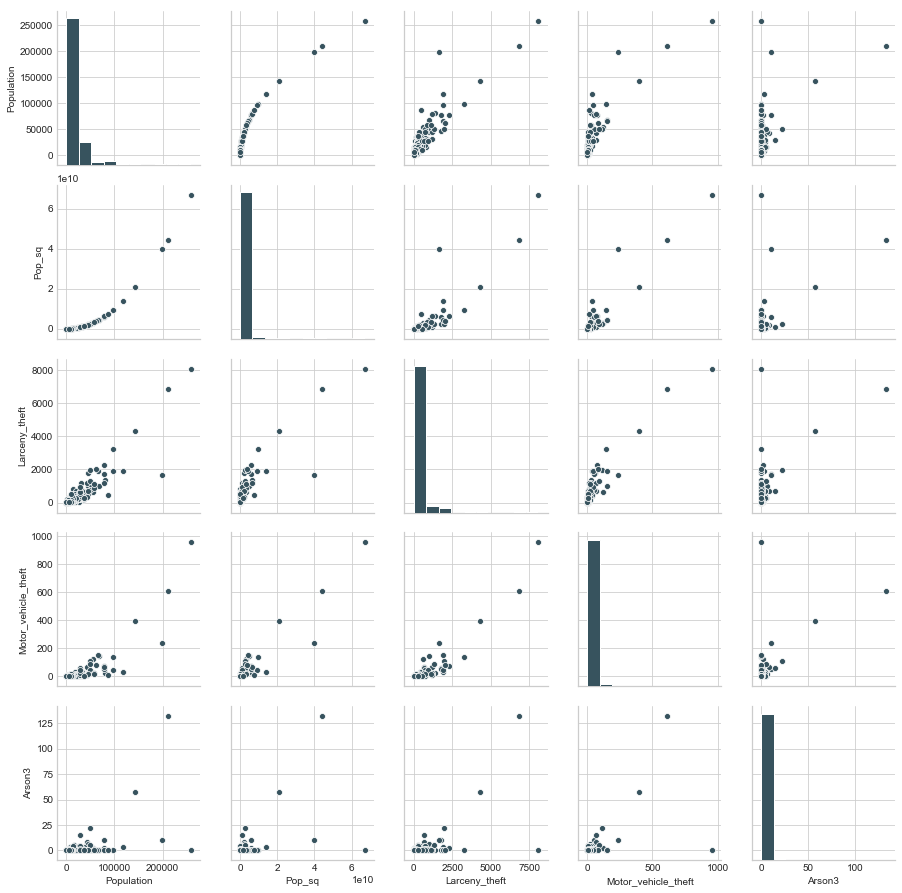

In [32]:
sns.pairplot(nonyc[['Population', 'Pop_sq', 'Larceny_theft', 'Motor_vehicle_theft', 'Arson3']])

**Training model**

In [40]:
y = nonyc['Property_crime']

In [41]:
X = nonyc[['Population', 'Pop_sq', 'Larceny_theft', 'Motor_vehicle_theft', 'Arson3']]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression()

In [46]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-1.03034811e-03 -9.26067830e-09  1.15725488e+00  4.20049911e+00
  1.68217116e+00]


In [48]:
predictions = lm.predict( X_test)

**Predictions model graph**

Text(0,0.5,'Predicted Y')

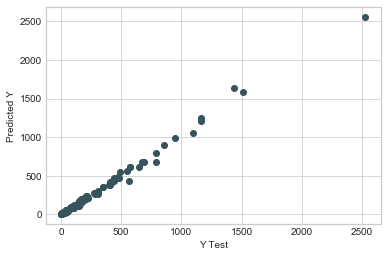

In [49]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

**Metrics to evaluate the linear regression model**

In [50]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 18.093812164948645
MSE: 1089.6644239477946
RMSE: 33.01006549444873


**Histogram of y-test predictions**


C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


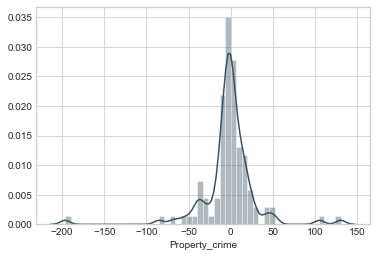

In [51]:
sns.distplot((y_test-predictions),bins=50);

**Coeffecients of the linear regression model**

Tells us something about the size of the effect on Y-variable Property Crime. 

In [52]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Population,-0.001
Pop_sq,-0.000
Larceny_theft,1.157
Motor_vehicle_theft,4.200
Arson3,1.682


**Interpreting - coefficients:**

A. Holding all other features fixed, a 1 unit increase in Population is associated with an increase of -0.001 in the Property Crime. Had no effect on the linear regression. 

B. Holding all other features fixed, a 1 unit increase in Pop2 (population squared) is associated with an increase of -0.000 in the Property Crime. Had no effect on the linear regression.

C. Holding all other features fixed, a 1 unit increase in Larceny (Larceny_theft) is associated with an increase of 1.157 in the Property Crime. 

D. Holding all other features fixed, a 1 unit increase in Length of Motor theft (Motor_vehicle_theft) is associated with an increase of 4.200 in the Property Crime. 

E. Holding all other features fixed, a 1 unit increase in Length of Arson3 is associated with an increase of 1.682 in the Property Crime.



**Linear Regression model**

Coefficients: -1.21670460e-03 -6.26754102e-09  1.16107612e+00  3.98065169e+00
   1.86336676e+00
   
Y-intercept: 4.25312406

**R-Squared: 0.9988474578363415**

In [53]:
regr = linear_model.LinearRegression()
Y = nonyc['Property_crime'].values.reshape(-1, 1)
X = nonyc[['Population', 'Pop_sq', 'Larceny_theft', 'Motor_vehicle_theft', 'Arson3']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-1.21670460e-03 -6.26754102e-09  1.16107612e+00  3.98065169e+00
   1.86336676e+00]]

Intercept: 
 [4.25312406]

R-squared:
0.9988474578363415


**Seaborn (sns) regression plot**

Tight relationship between Larceny and Property Crime. 

(0, 1000)

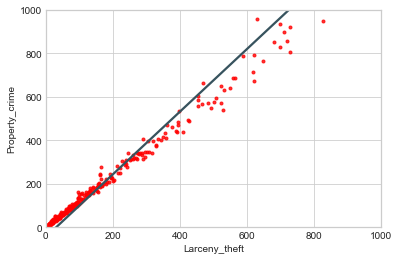

In [54]:
sns.regplot(nonyc.Larceny_theft, nonyc.Property_crime, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,1000)
plt.ylim(0, 1000)

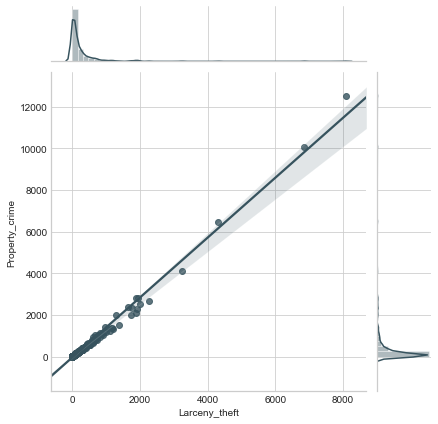

In [55]:
sns.jointplot(x='Larceny_theft',y='Property_crime',data=nonyc,kind='reg')

In [56]:
regr = skl_lm.LinearRegression()

X = nonyc[['Population','Pop_sq','Larceny_theft', 'Motor_vehicle_theft', 'Arson3']].as_matrix()
y = nonyc.Property_crime

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[-1.21670460e-03 -6.26754102e-09  1.16107612e+00  3.98065169e+00
  1.86336676e+00]
4.253124055730041


C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


**Plotting X-Y-Z**

Property Crime ~ Larceny + Motor theft 

In [57]:
# Create a coordinate grid
Larceny_theft = np.arange(0, 1000)
Motor_vehicle_theft = np.arange(0, 55)

B1, B2 = np.meshgrid(Larceny_theft, Motor_vehicle_theft, indexing='xy')
Z = np.zeros((Motor_vehicle_theft.size, Larceny_theft.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

(0, 1000)

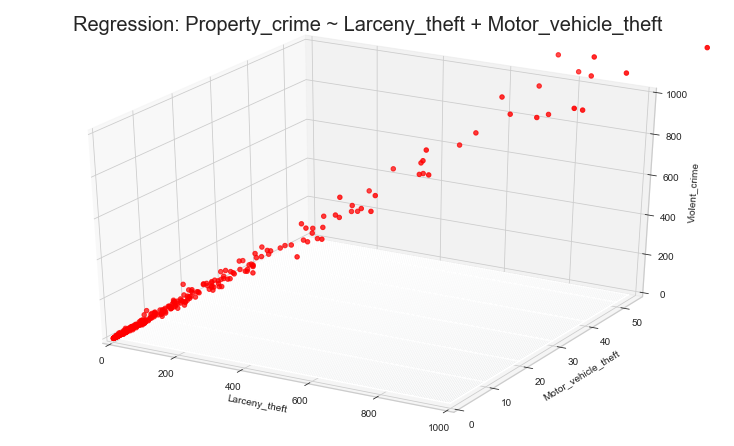

In [58]:
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Property_crime ~ Larceny_theft + Motor_vehicle_theft', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(nonyc.Larceny_theft, nonyc.Motor_vehicle_theft, nonyc.Property_crime, c='r')

ax.set_xlabel('Larceny_theft')
ax.set_xlim(0, 1000)
ax.set_ylabel('Motor_vehicle_theft')
ax.set_ylim(0, 55)
ax.set_zlabel('Violent_crime')
ax.set_zlim(0, 1000)


**Plotting the residuals**

In [59]:
regr = skl_lm.LinearRegression()

# Linear fit
X = nonyc.Population.values.reshape(-1,1)
y = nonyc.Property_crime
regr.fit(X, y)

nonyc['pred1'] = regr.predict(X)
nonyc['resid1'] = nonyc.y = nonyc.Property_crime - nonyc.pred1

# Quadratic fit
X2 = nonyc[['Population', 'Pop_sq']].as_matrix()
regr.fit(X2, y)

nonyc['pred2'] = regr.predict(X2)
nonyc['resid2'] = nonyc.Property_crime - nonyc.pred2

C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':
C:\Users\mille\Conda3\lib\site-packages

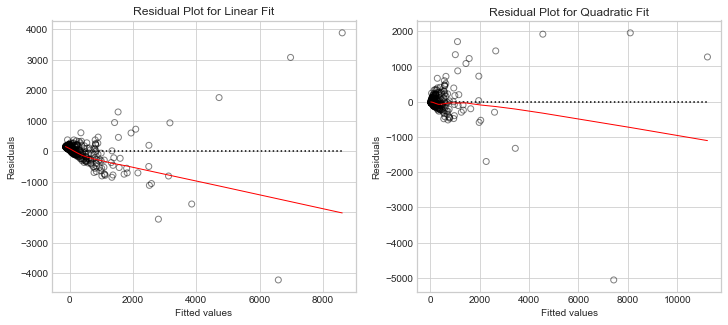

In [60]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(nonyc.pred1, nonyc.resid1, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(nonyc.pred2, nonyc.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

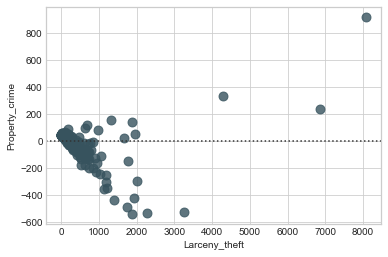

In [61]:
sns.residplot(x="Larceny_theft", y="Property_crime", data=nonyc,
              scatter_kws={"s": 80});